##  Introducing the Fibonacci sequence

We start with a sequence of numbers called the **Fibonacci sequence**:

In [3]:
sec_to_lst,lst = (1,1)

print(f"\n{sec_to_lst}",end=" ")

for i in range(20):
    print(f"{lst}",end=" ")
    sec_to_lst,lst = lst, sec_to_lst+lst
    
print("...")


1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 ...


Note that each term after the first `1 1` is the sum of the previous two terms.  The code snippet above
just implements this simple idea, maintaining a pair consisting of the last two integers in the sequence which is used to construct the next pair.  This is an **exponentially growing** series even though it's extended by addition.  It's exponential because the amount added at each step grows, like successive generations of rabbits. In fact, the legend is that Fibonacci was trying to solve a problem about rabbit population size when he first defined the series that is named after him.

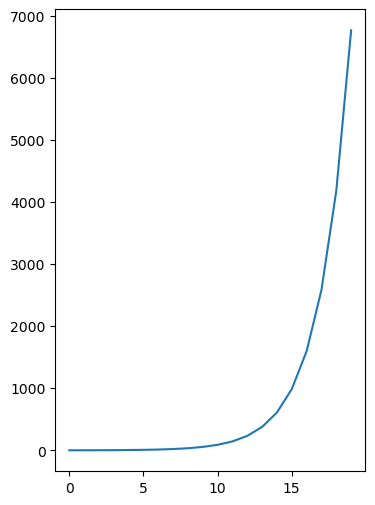

In [5]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax = plt.subplots(1,1,figsize=(4,6))

a,b=1,1
y =[a,b]

for i in range(18):
    (a,b) = (b, a+b)
    y.append(b)

ax.plot(np.arange(20),y)

The Fibonacci Sequence crops up in many places in nature, mathematics, and applied mathematics (of which
Computer Science is one large branch).  [Wikipedia](https://en.wikipedia.org/wiki/Fibonacci_sequence) tells us:

> Applications of Fibonacci numbers include computer algorithms such as the Fibonacci search technique and the Fibonacci heap data structure, and graphs called Fibonacci cubes used for interconnecting parallel and distributed systems. They also appear in biological settings, such as branching in trees, the arrangement of leaves on a stem, the fruit sprouts of a pineapple, the flowering of an artichoke, and the arrangement of a pine cone's bracts ...

## The Golden Ratio and the Fibonacci sequence

The theme of this notebook is how the structure of the Fibonacci sequence is tangled up with
a single number called the **the golden ratio**.

Below we draw the Golden Rectangle, so called because the proportions of its sides 
a and b are "golden".  What makes the proportions golden is that the proportions of the larger rectangle
below it, constructed with sides $a+b$ and $b$, are the same.


That is,

$$
\frac{b}{a} = \frac{b+a}{b}
$$


#### Useful references 

1. [Reich's discussion of Fibonacci numbers](https://math.temple.edu/~reich/Fib/fibo.html)
2. [Mathworld Wolfram on loarithmic spirals.](https://mathworld.wolfram.com/LogarithmicSpiral.html)
3. [Wikipedia spiral page.](https://en.wikipedia.org/wiki/Spiral)   See especially for definition of polar slope angle.
4. [Wikipedia Logarithmic Spiral page.](https://en.wikipedia.org/wiki/Logarithmic_spiral)
5. [Basic differential geometry definition definition of tangential angle](https://mathworld.wolfram.com/TangentialAngle.html)

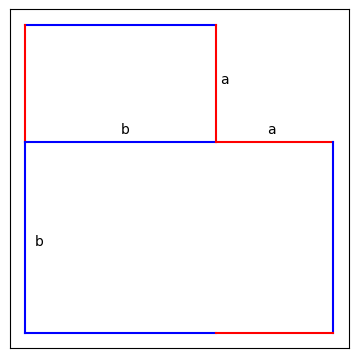

In [1]:
import numpy as np
from matplotlib import pyplot as plt

phi = 2* np.cos (np.pi/5)
a,b = 1,phi

fig, ax0 = plt.subplots(1,1,figsize=(4.4,4.4))

# side b lower
ax0.plot([0,b], [0,0],c="b")
#side b upper
ax0.plot([0,b], [a,a],c="b")
# side a left
ax0.plot([0,0], [0,a],c="r")
# side a right
ax0.plot([b,b], [0,a],c="r")

# Lower a extension
ax0.plot([b,b+a],[0,0],c="red")

#Lower b extensions
ax0.plot([0,0],[0,-b],c="b")
ax0.plot([b+a,b+a],[0,-b],c="b")

# Lower Parallels
# b part
ax0.plot([0,b], [-b,-b],c="b")
# a part
ax0.plot([b,b+a],[-b,-b],c="r")

ax0.set_aspect("equal")
ax0.set_xticks([],[])
ax0.set_yticks([],[])
ax0.annotate('b', xy=(b/2, .08))
ax0.annotate('b', xy=(.08, -.54*b))
ax0.annotate('a', xy=(b, a/2), xytext=(3, 0), textcoords="offset points")
_ = ax0.annotate('a', xy=(b+.4*a, .08), xytext=(3, 0), textcoords="offset points")

Letting $\phi$ be the proportion we seek ($\phi=b/a$), we can write:

$$
\frac{b}{a} = \frac{b+a}{b} \Longrightarrow \phi = 1 + \frac{1}{\phi}
$$

The positive solution to the quadratic equation is (using the quadratic formula):

$$
\phi = \frac{1 + \sqrt{5}}{2}
$$

This number is the **Golden ratio** (yes, that's right, the god(desse)s of Math have decreed
that the Golden Ratio is irrational).  We compute its value (as best it can be computed) in the next cell.

In [2]:
phi = (1 + np.sqrt(5))/2
phi

1.618033988749895

You can also use numpy.

In [3]:
#  Solve the quadratic equation x^2 - x - 1 = 0 using numpy (=np)
phi0, psi0 = np.roots([1,-1,-1])
phi0,psi0

(1.618033988749895, -0.6180339887498948)

Note that there are TWO solutions.  For now, we'll ignore the negative one because we don't know how to draw rectangles with sides of negative lengths.  Later on we will make use of both values.  They are "negative inverses".  That is

In [4]:
phi0*psi0

-0.9999999999999999

A note:  Though we do not illustrate this in the diagram, the construction above is recursive, because the second rectangle is just as much a golden rectangle as the first.  Therefore we can repeat the construction and draw a third rectangle with sides 2b + a, b + a below the second.  That rectangle too will be golden.  And below that we can construct a fourth golden rectangle, and so on.  It's golden rectangles all the way down.

We never solved for $a$ and $b$ of course. But these conclusions are true for any rectangle with golden proportions.  So consider $a=1$ and $b=\phi$. Then the third rectangle's proportions must be golden as well
and that means

$$
\frac{2b+a}{b+a} = \frac{2\phi + 1}{\phi + 1} = \phi
$$

And indeed

In [5]:
(2*phi + 1)/(phi + 1)

1.618033988749895

And since

$$
\phi = 1 + \frac{1}{\phi} = \frac{\phi + 1}{\phi}
$$

we have

$$
\begin{array}{rr}
1     & \phi^0\\
\phi  & \phi^1\\
\phi + 1 & \phi^2\\
2\phi + 1 & \phi^{3}
\end{array}
$$

Hmmm.  The sides of the successive rectangles are powers of $\phi$! We'll return to the significance of this relationship below.

In the meantime note: So also for a rectangle with sides $3\phi+2$ and $2\phi +1$: as we keep growing the rectangle sides  the ratio remains constant.

And here is the first of many connections of the Golden Ratio $\phi$ to the Fibonnaci
Sequence:  At the limit, the ratio of successive terms in the Fibonacci sequence is $\phi$.
We demonstrate:

In [8]:
# Another way of computing phi is 2* np.cos (np.pi/5).  Explained below.
print(f"                       phi = {2* np.cos (np.pi/5)}",end="\n\n")
   

a,b = (1,1)
print("  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)")
print("-"*42)
for i in range(1,31):
    print(f"{i: >3d}  {a:>8d}  {b: 8d}      {b/a}")
    a,b = b, a+b

                       phi = 1.618033988749895

  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)
------------------------------------------
  1         1         1      1.0
  2         1         2      2.0
  3         2         3      1.5
  4         3         5      1.6666666666666667
  5         5         8      1.6
  6         8        13      1.625
  7        13        21      1.6153846153846154
  8        21        34      1.619047619047619
  9        34        55      1.6176470588235294
 10        55        89      1.6181818181818182
 11        89       144      1.6179775280898876
 12       144       233      1.6180555555555556
 13       233       377      1.6180257510729614
 14       377       610      1.6180371352785146
 15       610       987      1.618032786885246
 16       987      1597      1.618034447821682
 17      1597      2584      1.6180338134001253
 18      2584      4181      1.618034055727554
 19      4181      6765      1.6180339631667064
 20      6765     10946      

The key point is that the members of the sequence eventually come to have the same relationship
as the sides of the golden rectangles (which are powers of $\phi$) in the recursive construction
above: their ratio is $\phi$.  In the appendix we sketch a proof of this wonder.  It will depend on
discovering a relationship between successive members of the sequence and successive powers of $\phi$.

The next cell contains Python code implementing a variety of ways to compute Fibonacci sequences,
including an iterative function, a recursive function, a Python generator (really a special kind
of iteration function), two matrix powers computations, and a closed form function (derived
from the matrix powers algorithm).  The last is the most efficient, but not by as much as
you might think.

What the variants demonstrate is the difference between three ideas: implementation, algorithm,
and function. An algorithm is a step-by-step recipe for computing something. Even though it
must be specific enough to be implementable, it may still leave out many details of how
the computation is done.  Arguably, there are only two algorithms in the code below, the 
summing of successive integer pairs we demonstrated above, and the closed form computation
that is the result of mathematical insight.  More precisely, the algorithm we presented is

$$
\begin{array}{ll}
\text{while} &\text{ctr} < n:\\
              &(a,\, b) \mapsto (b,\, a + b)\\
              &\text{ctr} += 1
\end{array}
$$

An implementation of an algorithm is a specific
embodiment in code.  Below we give iterative and recursive implementations of the successive summing
algorithm for computing the nth Fibonacci number.  Then we give a Python generator version,
which is only a slight implementational variant of the iterative version, but that variant
can have huge memory usage advantages.  Then we move on to a matrix powers implementation
which involves taking the nth power of a matrix to compute the nth Fibonacci term.  That looks
very different but in fact each successive multiplication by the Fibonacci matrix just maps
$(a,\, b)$ to $(b,\, a + b)$, essentially the same algorithm.  We then present a variation
of the matrix powers idea which implements taking the nth power by diagonalizing the
Fibonacci matrix, allowing a significant speed-up because taking powers of diagonal
matrixes is much faster. Still the matrix multiplications involved  just
map successive values of $(a,\, b)$ to $(b,\, a + b)$. Finally there is a closed form 
computation involving something called Binet's Formula. This exploits the relationship between
Fibonacci numbers and power of $\phi$ that we noted above.  And it is a genuine break with 
the other methods for computing $\text{F}_{n}$.
We defer explanation of the relationship until later.  For now it will suffice to 
examine the formula like something dropped from the sky:

$$
\text{F}_{n} = \frac{1}{\sqrt{5}}(\phi^{n} - (1 - \phi)^{n})
$$

No obvious connection, is there?  No successive mapping of pairs, no successive summing. And suddenly, magically,
$\phi$ appears in what is probably the most compelling illustration of the deep connection of $\phi$ 
and the Fibonacci sequence. And by the way, 
where did $\sqrt{5}$ come from? This is a different algorithm.  Conceptually,
it is a short step from the computation by diagonalized matrix (we sketch the step below), but
in that step everything has changed.  As to computational efficiency, it must be an improvement (but see
the actual timing results below).  

Final distinction to be made. What's practical.  The closed form approach implemented
below is faster, consistently twice as fast on my MacBookPro 18,3 with an 8-core Apple M1 Pro
CPU.  However it does not get the right answer for large n.  For example, for $\text{F}_{100}$
we have

$$
\begin{array}{l|cc|cc}
                    &  \text{F}_{72}  & \Delta  &  \text{F}_{100} & \Delta \\
                    \hline
\text{Closed form}  & 498,454,011,879,265 &1 & 354,224,848,179,263,111,168 & 1,196,093\\
\text{Iterative} &  498,454,011,879,264  & \_  &  354,224,848,179,261,915,075 & \_
\end{array}
$$

At n= 72, the closed form function 
differs by 1 from the iterative function (which agrees with Google and WolframAlpha in its results);
by n =100, the difference is nearly 1.2 million. The details may vary on various
machines, but I'll note that Fabian Dablander (cited below) also cites major
issues around this value of n.  

The problems actually start at lower numbers.  The attentive code-reader will note
that the definition of `fibonacci_closed_form` wraps the expression
in the `int(...)` function before returning a value.  This is because the function 
would never return an integer value otherwise.  For example, here's the value returned for n=12
with no `int` wrapper

In [119]:
(phi**12 - neg_phi_inv**12)/np.sqrt(5)

144.00000000000006

The math is completely correct and completely accurate.  The problems start with the $\sqrt{5}$
in the definition of $\phi$, which is an irrational number that cannot be precisely represented
on a computer.  The minute you type `np.sqrt(5)` into Python you're dealing with an approximation. The problems then  mount up because under certain conditions floating point calculations inflate errors 
the more operations they require, and eventually, by the time you get to
$n=100$, you have an error of over 1 million, which sounds awful, but really isn't so bad when you 
consider you're computing a number over 350 quintillion. That's an error of about
$0.0000000000003\%$.

The moral: In the end practical considerations may trump everything, including the best
math and computer science.  The reason to be educated about programming is to know what
your options are.  For most conceivable purposes, an error of $0.0000000000003\%$ will
be no error at all and you can run with the faster alternative. However, if you
happen to be entered in a competitive computing tournament, it may be disastrous.  The good
old iterative algorithm we started with may well be the best option.  Other considerations
that may affect your choice: the amount of memory on your machine, 
the structure of your problem (for example,
whether your problem can be formulated in matrix form),
the real world usage context (are you putting this code on a server
with thousands of hits an hour, so that efficiency practically outweighs all
else?), whether parallelism can be deployed, and so on.

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from functools import cache

def fibonacci_seq_n_iterative(n):
    """
    Return the nth Fibonacci number.
    
    Classic iterative definition of fibonacci sequence.
    """
    assert n > 0,"Use only positive n"
    a,b=(1, 1)
    #  This works on the corner cases n=0 n=1 because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(1,n):
        a,b = (b, a+b)
    return a


def fibonacci_seq_n2 (n):
    """
    Non-caching Copy of fibonacci_seq_n for demonstrating caching effects.
    
    Return the nth Fibonacci number.
    
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibonacci_seq_n2(n-2) + fibonacci_seq_n2(n-1)
 
@cache
def fibonacci_seq_n (n):
    """
    Return the nth Fibonacci number.
    
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.
    """
    assert n > 0,"Use only positive n"
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibonacci_seq_n(n-2) + fibonacci_seq_n(n-1)
    
def fibonacci_tail(n):
    """
    Attemot to do tail recursion optimization by hand
    """
    def fibonacci_helper(n, acc1, acc2):
        if n == 0:
            return acc1
        return fibonacci_helper(n - 1, acc2, acc1+acc2)
    return fibonacci_helper(n, 0, 1)

from bitstring import BitArray
#https://bitstring.readthedocs.io/en/stable/

def bits(n):
    return BitArray(bin(n))
#a = BitArray(6000000)
#a=BitArray(uint=42, length=8)

def old_bits(n):
  """Represent an integer as an array of binary digits.
  """
  bits = []
  while n > 0:
    n, bit = divmod(n, 2)
    bits.append(bit)
  bits.reverse()
  return bits
 
def fib_mat(n):
  assert n >= 0
  a, b, c = 1, 0, 1
  for bit in old_bits(n):
    a, b, c = a*a + b*b, a*b + b*c, b*b + c*c
    if bit: a, b, c = b, c, b+c
  return b

def fib_fast(n):
  assert n >= 0
  a, b, c = 1, 0, 1
  for bit in old_bits(n):
    if bit: a, b = (a+c)*b, b*b + c*c
    else:   a, b = a*a + b*b, (a+c)*b
    c = a + b
  return b

def fibonacci_seq_n_generator(n):
    """
    A generator that yields the Fibonacci sequence up to n or generates
    it an integer at a time.
    """
    assert n > 0,"Use only positive n"
    a,b=(1, 1)
    #  This works on the corner cases because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(n):
        yield a
        a,b = (b, a+b)
        
##########################################################################
#  Linear Algebra computation of Fib_n using powers of a matrix 
########################################################################

########################################################################
# Things to precompute
########################################################################

# Fib relation is a linear map
# (a b) |->  (a+b a)
fib_M = np.array([[1,1],[1,0]])
init = np.array([1,0])
##  this works too but the form is
## # (a b) |->  (b a+b)
fib_M2 = np.array([[0,1],[1,1]])
init2 = np.array([0,1])

# fib_M eigen values are -1/phi, and phi 
# fib_M eigen vecs are unit vecs pointing in the direction
# of (1,phi) and (1,-1/phi) !
fib_evals, fib_evecs = np.linalg.eig(fib_M)
# Precompute the change of basis into the eigenspace
eigenspace_init = fib_evecs.T@init
evals_diag = np.diag(fib_evals)
# Some constants
phi = (1 + np.sqrt(5))/2
log_phi = np.log(phi)
## == phi**(-1)
phi_inv = phi - 1
log_phi_inv = np.log(phi_inv)
psi = -phi_inv
## 
phi_10 = phi**(10)
phi_m10 = phi**(-10)

@cache
def fib_matrix_power(n):
    """
    Make this a user function to enable caching.
    """
    return np.linalg.matrix_power(fib_M,n)


def fibonacci_seq_n_matrix (n):
    # Fib relation is a linear map
    # (a b) |->  (b a+b)
    # Return a from the nth power of the corresponding matrix
    return (fib_matrix_power(n)@init)[0]

def fibonacci_seq_n_matrix_diag(n):
    """
    Supposedly more efficient version of fibonacci_seq_n_matrix that uses
    diagonalized form of fib_M
    """
    # The version below should be equivalent to what's being used (but slower)
    return (fib_evecs@np.linalg.matrix_power(evals_diag,n)@eigenspace_init)[0]
    #return (fib_evecs@evals_diag**n@eigenspace_init)[0]

def fibonacci_closed_form (n):
    """
    Reputation as the Fastest Fib_n computation.
    Another illustration of the close connection of phi and fib.
    Recall that -1/phi = 1 - phi, so neg_phi_inv is defined as 1-phi.
    """
    return int((phi**n - psi**n)/np.sqrt(5))


def fibonacci_closed_form_exp (n):
    """
    This actually has slightly greater accuracy problems for large n.  But is
    competitive efficiency wose.
    """
    return int(1/np.sqrt(5)*(np.exp(log_phi*n) - ((-1)**n) * np.exp(log_phi_inv*n)))

## Notes on the code above

After you've used it with a large value, or while debugging, it may be a good idea to do this
because of the `@cache` decorator in the function definition.
which saves whatever values it computes and does not need to do the 
full recursion the second time through a particular n.

In [7]:
fibonacci_seq_n.cache_clear()

Saves memory, or while debugging it flushes possibly incorrect values.

In [8]:
fibonacci_tail(12)

144

In [9]:
fibonacci_seq_n (12)

144

In [13]:
print(f"{fibonacci_closed_form (50):,}")

12,586,269,025


In [14]:
print(f"{fibonacci_closed_form_exp (50):,}")

12,586,269,025


In [9]:
for i in range(1, 13):
    print(i,fibonacci_seq_n_iterative(i))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144


In [203]:
fibonacci_seq_n_iterative(50)

12586269025

In [201]:
fibonacci_seq_n(50)

12586269025

In [202]:
fibonacci_closed_form(50)

12586269025

####  Generator version

In [204]:
g = fibonacci_seq_n_generator(12)

In [205]:
next(g)

1

In [206]:
list(fibonacci_seq_n_generator(12))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [4]:
g = fibonacci_seq_n_generator(12)
print(list(g))
# this produces an error
next(g)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


StopIteration: 

In [780]:
for x in fibonacci_seq_n_generator(12):
    print(x)

1
1
2
3
5
8
13
21
34
55
89
144


## Timing results for the various Fibonacci n-functions

There are some surprises awaiting.  Be aware.  Your mileage may vary.  All I can say is this is what happened on my Mac.

The `timeit` module is said to be best performance measurer for small chunks of code.  We'll use it. The first function timed (`fibonacci_seq_n`) generally achieves the best results.  

That's a bit of a surprise.  This is the recursive version of Fibonacci...

What's going on?

In [94]:
timeit.timeit(lambda: "-".join(map(str, range(100))), number=10000)

0.10123529098927975

In [93]:
timeit.timeit(lambda: "-".join(map(str, range(100))), number=100)

0.0038177501410245895

In [95]:
iters

10000

In [16]:
import timeit
n,iters = 500,10_000

# Now use the caching version.  But clear the cache first
#fibonacci_seq_n.cache_clear()
# Recursive implementation, almost always the fastest, go figure
#timer = timeit.Timer(lambda: fibonacci_seq_n(n))
#elapsed3 = timer.timeit(iters)
elapsed3 = timeit.timeit(lambda: fibonacci_seq_n(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.003647 seconds


Oh, the cache!  Let's try clearing it!

In [17]:
import timeit
n,iters = 500,10_000

# Now use the caching version.
fibonacci_seq_n.cache_clear()
# Recursive implementation, almost always the fastest, go figure
#timer = timeit.Timer(lambda: fibonacci_seq_n(n))
#elapsed3 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.003281 seconds


That made very little difference!  

Can you guess why that is, in the context of measuring performance?

Wait, let's try a version of the same function with  no caching at all...  And because I have some sense
of what's about to happen, ket's try that on a much lower value of $n$ first, $n=40$.

In [3]:
import timeit
n,iters = 40,10

elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 80.422317 seconds


We have an average of 8 secs for computing $F_{40}$.  Estimated time for $F_{n=50}$ with linear growth in computation time: 10 secs.

In [4]:
import timeit
n,iters = 50,1

elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n2(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 996.386352 seconds


Whoa!  Computing time for the recursive version with no caching definitely does **not** grow linearly.  We see
that as $n$ grows, computing time for that recursive version grows exponentially!

Let's take it off the table for now!

In [19]:
import timeit
n,iters = 500,10_000


# Iterative implementation
#timer = timeit.Timer(lambda: fibonacci_seq_n_iterative(n))
#elapsed3 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_iterative(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.158001 seconds


In [20]:
import timeit
n,iters = 500,10_000

# Now use the caching version.  But clear the cache first
#fibonacci_seq_n.cache_clear()
# Recursive implementation, almost always the fastest, go figure
#timer = timeit.Timer(lambda: fibonacci_seq_n(n))
#elapsed3 = timer.timeit(iters)
elapsed3 = timeit.timeit(lambda: fibonacci_tail(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.374014 seconds


In [23]:
import timeit
n,iters = 500,10_000

# Matrix implementation plain matrix powers calculation
#timer = timeit.Timer(lambda: fibonacci_seq_n_matrix(n))
#elapsed4 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_seq_n_matrix(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.017303 seconds


So not faster....  There is an improvement possible...  later ...

In [24]:
import timeit
n,iters = 500,10_000

# Matrix implementation with diagonalization, eigen computations precomputed (surprisingly bad)
timer = timeit.Timer(lambda: fibonacci_seq_n_matrix_diag(n))
elapsed3 = timer.timeit(iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.140508 seconds


In [25]:

import timeit
n,iters = 500,10_000

# The best closed form variant with issues discussed above
# Surprisingly NOT the fastest
#timer = timeit.Timer(lambda: fibonacci_closed_form(n))
#elapsed22 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_closed_form(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.022137 seconds


In [26]:
import timeit
n,iters = 500,10_000

# A closed form variant using exp or exponentiation
# The conversion of phi and phi^{-1} to log form is precomputed, so its 
# ... exp(n*log_phi) - ... exp(n*log_inv_phi) ...
#timer = timeit.Timer(lambda: fibonacci_closed_form_exp(n))
#elapsed3 = timer.timeit(iters)
elapsed3 =  timeit.timeit(lambda: fibonacci_closed_form_exp(n),number=iters)
print(f'Time taken: {elapsed3:.6f} seconds')

Time taken: 0.037465 seconds


Better method.  Do timing runs for different systems as closely together as possible to keep
background computational load as similar as possible.

In [29]:
import timeit
n,iters = 500,10_000

fns = fibonacci_seq_n, fibonacci_seq_n_iterative,fibonacci_seq_n_matrix,fibonacci_tail,\
                    fibonacci_seq_n_matrix_diag,fibonacci_closed_form,fibonacci_closed_form_exp#,fib_fast

fn_dict= dict()
for fn in fns:
    fn_dict[fn.__name__] = timeit.timeit(lambda: fn(n),number=iters)

In [30]:
n,iters = 500,10_000
time_list = sorted(list(fn_dict.items()),key=lambda x: x[1])
for (fn_name,elapsed)  in time_list:
    print(f'{fn_name:<30} {elapsed:.6f}')

fibonacci_seq_n                0.003734
fibonacci_seq_n_matrix         0.006695
fibonacci_closed_form          0.008779
fibonacci_closed_form_exp      0.018952
fibonacci_seq_n_matrix_diag    0.110969
fibonacci_seq_n_iterative      0.162197
fibonacci_tail                 0.343551


In [31]:
time_list = sorted(list(fn_dict.items()),key=lambda x: x[1])
for (fn_name,elapsed)  in time_list:
    print(f'{fn_name:<30} {elapsed:.6f}')

fibonacci_seq_n                0.003734
fibonacci_seq_n_matrix         0.006695
fibonacci_closed_form          0.008779
fibonacci_closed_form_exp      0.018952
fibonacci_seq_n_matrix_diag    0.110969
fibonacci_seq_n_iterative      0.162197
fibonacci_tail                 0.343551


In [32]:
time_list = sorted(list(fn_dict.items()),key=lambda x: x[1])
for (fn_name,elapsed)  in time_list:
    print(f'{fn_name:<30} {elapsed:.6f}')

fibonacci_seq_n                0.003734
fibonacci_seq_n_matrix         0.006695
fibonacci_closed_form          0.008779
fibonacci_closed_form_exp      0.018952
fibonacci_seq_n_matrix_diag    0.110969
fibonacci_seq_n_iterative      0.162197
fibonacci_tail                 0.343551


### More systematic timing

The big flaw of the previous approaches is not exploring multiple values of n.   Bad algorithms
often blow up somewhere along the way as `n` (some characerization of the size of the
problem) increases.  In fact we saw that above with `fibonacci_seq_n2` the non-caching version
of the recursive implementation when moving from $n=40$ to $n=50$ blew up computation time
by a factor of 100.

In [33]:
import timeit
from matplotlib import pyplot as plt

def timings(fns, log_lb=1,log_ub=3.1,iters=10_000,num_pts=25):
    # create array of nvalues to time results for. We will turn these into ints
    # Logscale for meaningful variation.
    n_array = np.floor(np.logspace(log_lb, log_ub, num_pts))
    num_ns,num_fns = (len(n_array),len(fns))
    results = np.zeros((num_ns,num_fns))

    for (i,n) in enumerate(n_array):
        n=int(n)
        for (j,fn) in enumerate(fns):
            results[i,j] = timeit.timeit(lambda: fn(n),number=iters) 
    return results,n_array

def plot_timings (results,n_array,fns,legend_loc="center right"):
    (fig, ax) = plt.subplots(1,1)
    x = n_array
    for i in range(results.shape[1]):
        ax.plot(x,results[:,i],label=fns[i].__name__)
    _ = ax.legend(loc=legend_loc)

The value sof $n$ we'll explore:

In [35]:
#n_array  for the x-axis in the plots
np.floor(np.logspace(1, 3.14, 25))

array([  10.,   12.,   15.,   18.,   22.,   27.,   34.,   42.,   51.,
         63.,   77.,   95.,  117.,  144.,  177.,  217.,  267.,  327.,
        402.,  494.,  607.,  745.,  915., 1124., 1380.])

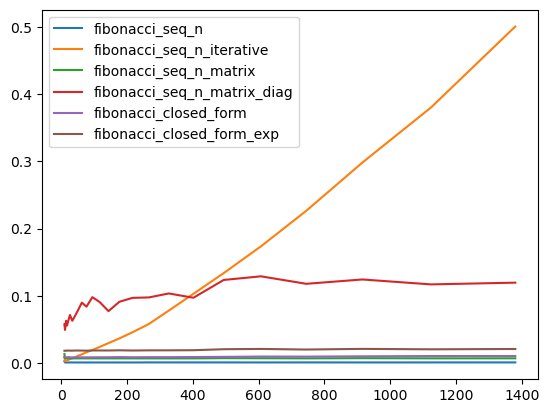

In [36]:
fns = fibonacci_seq_n, fibonacci_seq_n_iterative,fibonacci_seq_n_matrix,\
                    fibonacci_seq_n_matrix_diag,fibonacci_closed_form,fibonacci_closed_form_exp

# 1400 is about the most closed form function can take np.log10(1400)=3.14
# Try phi**1500
log_lb,log_ub,iters,num_pts= 1,3.14,10_000,25

results,n_array =timings(fns, log_lb=log_lb,log_ub=log_ub,iters=iters,num_pts=num_pts)
plot_timings (results,n_array,fns,legend_loc="upper left")

The functions `fibonacci_seq_n_iterative` and `fibonacci_seq_n_matrix_diag` are ill-behaved with respect
to the others.  The run time of `fibonacci_seq_n_iterative` rises much faster than the  others as `n` increases.
The run time of `fibonacci_seq_n_matrix_diag` becomes high for fairly low $n$ and stays there.

For better visual resolution, remove outliers:

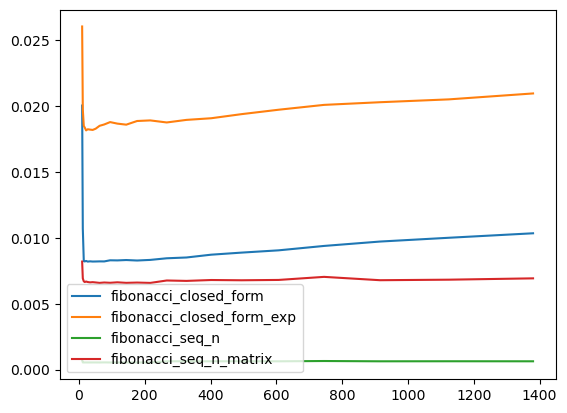

In [37]:
fns = fibonacci_closed_form,fibonacci_closed_form_exp, fibonacci_seq_n, fibonacci_seq_n_matrix

results,n_array =timings(fns, log_lb=log_lb,log_ub=log_ub,iters=iters,num_pts=num_pts)
plot_timings (results,n_array,fns,legend_loc="lower left")

Result for the highest value of n we looked at for the 4 functions thta survived to this round:

In [231]:
for f in fns:
    print(f.__name__)
results[-1,:]

fibonacci_closed_form
fibonacci_closed_form_exp
fibonacci_seq_n
fibonacci_seq_n_matrix


array([0.01047033, 0.02102733, 0.00064533, 0.00706796])

Align the the two sequences by enumeration:

In [232]:
for (i,f) in enumerate(fns):
    print(f"{f.__name__:<30} {results[-1,i]:.5f}")

fibonacci_closed_form          0.01047
fibonacci_closed_form_exp      0.02103
fibonacci_seq_n                0.00065
fibonacci_seq_n_matrix         0.00707


Align by zipping and sort by time:

In [233]:
timing_results = list(zip((fn.__name__ for fn in fns),results[-1,:]))
#print(timing_results)
timing_results.sort(key=lambda x: x[1])
for (f,t) in timing_results:
    print(f"{f:<30} {t:.5f}")

fibonacci_seq_n                0.00065
fibonacci_seq_n_matrix         0.00707
fibonacci_closed_form          0.01047
fibonacci_closed_form_exp      0.02103


## Accuracy results for closed form function

Restating what was said in the introduction:  The closed form computation is inaccurate
for larger values of n; all the others using some sort of iteration of addition on integers are accurate.

Here's the code to test your own version

In [875]:
for n in range(20,99):
    v1 = fibonacci_closed_form_float_issues(n) 
    v2 = fibonacci_seq_n (n)
    if (v1 != v2):
        print(f"{n}")
        print(f"Closed form: {v1:,}")
        print(f"Accurate:    {v2:,}")
        break

72
Closed form: 498,454,011,879,265
Accurate:    498,454,011,879,264


In [876]:
n=100
v1 = fibonacci_closed_form_float_issues(n) 
v2 = fibonacci_seq_n (n)
print(f"{n}")
print(f"Closed form: {v1:,}")
print(f"Accurate     {v2:,}")

100
Closed form: 354,224,848,179,263,111,168
Accurate     354,224,848,179,261,915,075


## The matrix calculation of Fibonacci numbers

We implement the idea that the Fibonacci update on a vector of two integers is a Linear Map with an associated matrix.  This matrix powers approach to computing is discussed in a number of places.  It's describe don the Fibonacci Sequence Wikipedia page.  I first read through it in 
[Fabian Dablander's blog post}.](https://fabiandablander.com/r/Fibonacci.html) 

Here's a quick demo.  We'll show how it works and then how we chose the matrix `fib_M` below.

In [232]:
fib_M = np.array([[1,1],
                  [1,0]])

$\text{F}_n$ is found by applying `fib_M` repeatedly to an initial Fibonacci pair vector.

In [233]:
init = np.array([1,0])

We now calculate $\text{F}_{12}$ which rerquires calculating all $\text{F}_{n}$ up through $\text{F}_{12}$:

In [235]:
vec = init
print(" n+1    n    v[0]  v[1]  ")
for i in range(13):
    print(f" {i+1:>2}    {i:>2}   {vec[0]: >3}   {vec[1]: >3} ")
    vec = fib_M@vec

 n+1    n    v[0]  v[1]  
  1     0     1     0 
  2     1     1     1 
  3     2     2     1 
  4     3     3     2 
  5     4     5     3 
  6     5     8     5 
  7     6    13     8 
  8     7    21    13 
  9     8    34    21 
 10     9    55    34 
 11    10    89    55 
 12    11   144    89 
 13    12   233   144 


So finding the 12th Fibonacci number amounts to taking the matrix product of `fib_M`${}^{12}$ with
$\left (\begin{array}{c}1\\0\end{array}\right )$:


In [236]:
init = np.array([1,0])
np.linalg.matrix_power(fib_M,12)@init

array([233, 144])

Note we **don't** do this

In [234]:
(fib_M**12)@init

array([1, 1])

Because `fib_M**12` is

In [235]:
(fib_M**12)

array([[1, 1],
       [1, 0]])

This is just elementwise power-raising or elementwise multiplication 12 times. Elementwise power-raising  is this:

$$
\prod_{i=1}^{12} \left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack
= \underbrace{\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack \times
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack \times \dots
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack}_{\text{12 times}}
= 
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array} \right \rbrack
$$

Instead we do
$$
\text{np.linalg.matrix_power}\left ( \left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack,
12 \right )
= \underbrace{\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack @
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack @ \dots
\left \lbrack
\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}
\right \rbrack}_{\text{12 times}}
= 
\left \lbrack
\begin{array}{cc}
233 & 144\\
144 & 89
\end{array} \right \rbrack
$$



Matrix multiplication

$$
= \underbrace{
\left \lbrack
\begin{array}{cc}
a & b\\
c & d
\end{array}
\right \rbrack  @ 
\left ( \begin{array}{c} x \\ y \end{array} \right )}_{\text{Python}}
=
\left \lbrack
\begin{array}{cc}
a & b\\
c & d
\end{array}
\right \rbrack
\left ( \begin{array}{c} x \\ y \end{array} \right )
=
\left ( \begin{array}{c} x' \\ y' \end{array} \right )
=
\left ( \begin{array}{c} a\cdot x \,+\, b\cdot y \\ c\cdot x \,+\, d\cdot y \end{array} \right )
$$

If you're unfamiliar with matrix multiplication, it's useful to think of it as applying the coefficients
in a pair of equations defining the coordinates of the vector output by a **linear map**. So we see
the matrix multiplication above as implementing the map defined by the equations:

$$
%\left \lbrack
\begin{array}{ccccc}
a \cdot x & + & b \cdot y & = & x'\\
c \cdot x & + & d \cdot y & = & y'
\end{array}
%\right \rbrack  
%=
%\left ( 
%\begin{array}{c} x' \\ y' \end{array}
%\right )
$$

So:

$$
\left \lbrack
\begin{array}{cc}
a & b\\
c & d
\end{array}
\right \rbrack
\left ( \begin{array}{c} x \\ y \end{array} \right )
\text{ corresponds to }
\left ( \begin{array}{c} x \\ y \end{array} \right ) \mapsto 
\left ( \begin{array}{c}  a \cdot x & + & b \cdot y \\ c \cdot x & + & d \cdot y  \end{array} \right )
$$

Returning to the contrast with elementwise mutliplication:

In [226]:
fib_M*fib_M

array([[1, 1],
       [1, 0]])

In [225]:
fib_M@fib_M

array([[2, 1],
       [1, 1]])

How we discover fib_M: The linear transformation for the Fibonacci Sequence is


$$
T \left ( \begin{array}{c} a\\b \end{array} \right ) =  \left ( \begin{array}{c} a+b\\ a \end{array} \right )
$$
It follows that (see Dablander's blog for a detailed proof) that

$$
 T ^{n}\left ( \begin{array}{c} 1\\0 \end{array} \right ) =
 \left ( \begin{array}{c} \text{F}_{n+1}\\ \text{F}_{n} \end{array} \right ).
$$


We define the two columns of the matrix for T,
which we'll call `fib_M`, by looking at the values of T `(0,1)` and `(1,0)`.  

By the definition of T

$$
T\left(\,\left\lbrack \begin{array}{c}1\\0\end{array}\right \rbrack\,\right ) = \left\lbrack \begin{array}{c}1+0\\1\end{array}\right \rbrack = \left\lbrack \begin{array}{c}1\\1\end{array}\right \rbrack 
$$

By the definition of T

$$
T\left(\,\left\lbrack \begin{array}{c}0\\1\end{array}\right \rbrack\,\right ) = \left\lbrack \begin{array}{c}1+0\\0\end{array}\right \rbrack = \left\lbrack \begin{array}{c}1\\0\end{array}\right \rbrack 
$$

By the rules of matrix multiplication

$$
\begin{array}{lcl}
M\left(\,\left\lbrack \begin{array}{c}1\\0\end{array}\right \rbrack\,\right ) &=& \text{ the first column of M }\\
M\left(\,\left\lbrack \begin{array}{c}0\\1\end{array}\right \rbrack\,\right ) &=& \text{ the second column of M }
\end{array}
$$

So the matrix we want is

In [165]:
fib_M

array([[1, 1],
       [1, 0]])

Confirming Python agrees with us:

In [163]:
# Col 1 of fib_M. The result dictated by the definition of T
fib_M@(np.array([1,0]))

array([1, 1])

In [164]:
#Col 2 of fib_M
fib_M@(np.array([0,1]))

array([1, 0])

So Fibonacci calculations become

$$
\left (
\begin{array}{c}
\text{F}_{n+1}\\
\text{F}_{n}\\
\end{array}
\right )
=
\left (
\left \lbrack
\begin{array}{c}
1 & 1\\
1 & 0
\end{array}
\right \rbrack
\right)^{n}
\left (
\begin{array}{c}
0\\
1
\end{array}
\right )
$$

Actually we don't really need an initial vector, though it's convenient presentationally (for discussing the diagonalization computation to come).  Just taking powers of the inital matrix will get you
Fibonacci numbers;

In [238]:
np.linalg.matrix_power(fib_M,12)

array([[233, 144],
       [144,  89]])

So 

$$
\text{fib_M}^n = 
\left \lbrack \begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right \rbrack ^{n} =
\left \lbrack \begin{array}{cc}
F_{n+1} & F_{n}\\
F_{n} & F_{n-1}
\end{array}\right \rbrack ^{n} 
$$

## Exercise

### Introduction

As we saw at the outset, $\phi$ is the $x$ such that $x = 1 + 1/x$.  That is,

$$
(1)\, \phi^{1} = \phi^{0} + \phi^{-1}.
$$

From this it follows that for any $n$ (including negative or irrational $n$):

$$
(2)\, \phi^{n} = \phi^{n-1} + \phi^{n - 2}
$$

For any particular $n$,we derive the version of (2) that has $\phi^{n}$ on the
left hand side simply by multiplying both sides of (1) by $\phi^{n-1}$.
For example, if $n=3$, we multiply both sides of (1) by $\phi^{2}$ to get:

$$
\phi^{3} = \phi^{2} + \phi^{1}
$$


What (2) tells us, then, is that taking a power of $\phi$ may be reduced to addition:

The first function in the cell below takes advantage of this
relation to define an iterative function that computes 
positive integer powers of $\phi$.

For any non-negative integer `n`, `phi_pow_iterative(n)`
returns exactly the same result as $\phi^n$ or in Python
`phi**n`.  Notice how much the definition of `phi_pow_iterative(n)`
resembles the definition of `fibonacci_seq_n_iterative`.

In [71]:
def phi_pow_iterative (n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        (a,b) = (1,phi)
        for i in range (n-1):
            (a,b) = (b, a+b)
    return b
 

def alt_phi_pow_iterative(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only non-negative n"
    (a,b) = (phi-1,1)
    for i in range (n):
        (a,b) = (b, a+b)
    return b
   

To check our claim that for any non-negative integer `n`, `phi_pow_iterative(n)` 
returns exactly the same result as $\phi^n$, let's try `n=12`:

In [81]:
# phi is a name defined earlier in the notebook and which should be defoned when youi
# do this exercise.
phi**(12)

321.996894379985

And our phi functions return:

In [72]:
phi_pow_iterative(12)

321.99689437998484

In [82]:
alt_phi_pow_iterative(12)

321.99689437998484

Demonstrations of what's discussed below:

In [55]:
phi**(3),2*phi+1

(4.23606797749979, 4.23606797749979)

In [56]:
phi**(4), 3*phi+2

(6.854101966249686, 6.854101966249685)

In [57]:
phi**(5),5*phi+3

(11.090169943749476, 11.090169943749475)

###  What to do

Your assignment  is to write two functions. 

1.  First, write a recursive version 
of `phi_pow_iterative(n)`. Call it `phi_pow_recursive(n)`.  You should consult  `phi_pow_iterative(n)` to help
you decide how to formulate it, and you might also find it useful
to look at `fibonacci_seq_n`  defined earlier in the notebook. That
is a recursive definition of `fibonacci_seq_n_iterative`.

2.  Write another function (call it `phi_pow`) that for any $n$, returns the same value
as  `phi_pow_iterative(n)` and `phi_pow_recursive(n)` but is neither iterative nor
recursive.  Instead your function  should take advantage of the following
regularity, noted when we first introduced $\phi$:

    $$
\begin{array}{lclclcrl}
\phi^1 & &                &  &                    &=& \phi\\
\phi^2& &                 &  &                    &=&  \, \phi + 1 \\
\phi^3 &=& \phi^2 +\phi  &=& (\phi + 1) + \phi &=& 2\,\phi + 1\\
\phi^4 &=& \phi^3 + \phi^2 && & =& 3\,\phi + 2 &\\
\phi^5 &=& \phi^4 + \phi^3 && &= & 5\,\phi + 3 &\\
\end{array}
    $$

    That is, for any positive integer `n`, $\phi^{n}$ can be expressed in the form

    $$
\phi^{n} = j\phi  + k
    $$

    where `j` and `k` are  positive integers depending on `n`.  For example, when `n` is 5, `j` is 5 and `k` is 3.  The examples shown above should make it clear that when `n` is 6, `j` is 8 and `k` is 5.

1. Your function `phi_pow(n)` should return the same value as  $\phi^{n}$, but you should at least test it for `n=1` `n=2` and `n=12`.  
2. I am going to test your function on some unknown higher value of `n`, so you won't get full credit for simply precomputing the values `i` and `j` necessary for `n=1,n=2, ... n=12`. In fact, if you do that, you won't get any credit.
2.  Your answer shouldn't call `phi_pow_iterative(n)` or `phi_pow_recursive(n)` and it shouldn't incorporate any code from those functions or any functions you import from another module. A good rule of thumb: if you follow the hints in the instructions,  computing `phi_pow(12)` shouldn't involve computing `phi_pow(11)` or `phi_pow(10)`.
3.  **Hint**  A function defined elsewhere in this notebook may be of use, although you will get full credit if you compute $i$ and $j$ with your own code.

## Appendix

##  Binet's Form:  A more illuminating derivation of Binet's Formula

Following up on this exercise,
I'd like to present a simple "derivation" of the closed form formula for the nth Fibonacci
number which showcases the relationship of the closed form to the odd fact
that $\phi^{n}$ has a Fibonacci-like structure ($\phi^{n}$ is the sum of the 
$\phi^{n-1}$ and $\phi^{n-2}$).  It also introduces the number $\sqrt{5}$ in a fairly
transparent way.  

Here's a slightly disabbreviated form of the "derivation" of Binet's  formula, as prersented on [the Wikipedia page for the Fibonacci Sequence.](https://en.wikipedia.org/wiki/Fibonacci_sequence) You'll see
why I put word *derivation* in scare quotes below. 


First, recall that $\phi = 1 + 1/\phi$,
or more usefully for present purposes,  $\phi^1 = \phi^0 + \phi^{-1}$, we have  this general Fibonacci-like relation among powers of $\phi$:

$$
\begin{array}{llcl}
(i) & \phi^1 = \phi^0 + \phi^{-1}\\
(ii) & \phi^n = \phi^{n-1} + \phi^{n-2},\\
\end{array}
$$

where (ii) follows from (i) simply by multiplying both sides by $\phi^{n-1}$
Another way of putting this is that $\phi$ satisfies the following equation:

$$
\begin{array}{llcl}
(a) & x^2 &= & x^{0} + x^1 \\
\end{array}
$$

Any $x$ that satisfies (a) will also satisfy (b):

$$
\begin{array}{llcl}
   &  \mathbf {Fibonacci }\quad\mathbf{Relation}\\
(b) & x^n &= & x^{n-2} + x^{n-1}\\
\end{array}
$$

Well, there is another $x$ that satisfies (a) (and therefore also satisfies (b)). That is $-\phi^{-1}$
(recall that $-\phi^{-1}$ is the other solution to the equation $x = 1 + 1/x$):

$$
\begin{array}{llcll}
(a') & (-\phi^{-1})^2 &=& (-\phi^{-1})^{0} + (-\phi^{-1})^1 \\
    &  \phi^{-2}    &=& 1 + -\phi^{-1} \\
    &  0.381966... &= & -0.618033... + 1 &\text{dots mean an approximation of the actual value}\\
(b') & (-\phi^{-1})^n &= &(-\phi^{-1})^{n-1} + (-\phi^{-1})^{n-2}\\
\end{array}
$$


We will follow standard practice and write $-\phi^{-1}$ (the negative inverse of $\phi$) as $\psi$.

$$
\psi = -\phi^{-1}
$$

It follows that if we define a sequence S consisting of powers of either $\phi$ or $\psi$, S will 
satisfy the Fibonacci-like recurrence relation in (b).  That is, if the nth member of the sequence 
$S_{n}$ is defined by either

$$
S_{n} = \phi^{n}  \text{ or } S_{n} = \psi^{n}
$$

then 

$$
S_{n+1}  = S_{n-1} + S_{n-2}.
$$

Moreover, it is easy to show that the Fibonacci relation will still hold if we define $S_{n}$ using a linear combination of  powers of $\phi$ and $\psi$.

$$
\begin{array}{llcl}
      & & \mathbf {Binet's }\quad\mathbf{Form}\\
S_{n} &=& a\phi^{n} + b\psi^{n}
\end{array}
$$

We have called this general schema for Fibonacci-like Sequences **Binet's Form**.

The next step is to use Binet's Form to define the standard Fibonacci Sequence.
To do that all we need to do get the first two members of the sequence right.
The Fibonacci Sequence begins:

```python
0, 1, 2, 3, 5, 8, ...
```

All we need to do is choose $a$ and $b$ so as to fit Binet's Form and so that $S_{0}=0$ and $S_{1}=1$.
From there the Fibonacci relation will give us all the rest.
This gives us a pair of equations to solve.

$$
\begin{array}{llcl}
(i) & 0 &=& a\phi^{0} + b\psi^{0}\\
    &  &=& a + b\\
    & a &=& -b\\
\end{array}
$$

and 

$$
\begin{array}{llcl}
(ii) & 1 &=& a\phi^{1} + b\psi^{1}\\
\end{array}
$$

Using equation (i), we rewrite (ii) as:

$$
\begin{array}{llcl}
(ii) & 1  &=& a\phi -a \psi  \\
 & &=& a(\phi = \psi)\\
& a &=& 1/(\phi-\psi) = 1/(\phi + \phi^{-1}) 
\end{array}
$$

If this were any other number but $\phi$ we'd be done.  But $\phi$ lives in an algebra all its own.   Recall that for $\phi$ we know:

$$
\begin{array}{llcl}
 &  \phi &=& (1 + \sqrt{5})/2\\
(iv) & \sqrt{5} &=&2\phi - 1\\
       &  &= &\phi + (\phi - 1)\\
       & & =& \phi + \phi^{-1} = \phi - \psi
\end{array}
$$

Substituting (iv) into (ii) and using (i) we have:

$$
\begin{array}{lcl}
a &=& 1/\sqrt{5}\\
b &=& -1/\sqrt{5}
\end{array}
$$

And plugging these values for $a$ and $b$ into Binet's Form we have
the following as the definition for the standard Fibonacci Sequence:

$$
\begin{array}{lcl}
S_{n} &=& \frac{1}{\sqrt{5}}\lbrack\, \phi^{n} - \psi^{n}\,\rbrack,
\end{array}
$$

which agrees with we've been calling Binet's Formula.   So we  see that  the "derivation"
of Binet's Formula isn't so much a derivation of the formula from the sequence
as a different way of defining it that uses a more general perspective on the Fibonacci relation.
In a later section we'll see another example of a  Fibonacci-like Sequence of
integers.

Binet's Form really gets at the heart of why $\phi$ (and $\psi$)  are so intimately tied up
with Fibonacci Numbers:  Equation (b).  That's really all there is to it: Additive exponeniality.
But of course there aren't many numbers that satisfy (b); just two, in fact, and that's
what makes $\phi$ and $\psi$ special.

Note that Binet's Formula also explains the first conection we observed between the Fibonacci Sequence and the Golden Ratio $\phi$.  We have 

$$
\begin{array}{lcl}
S_{n} &=& \frac{1}{\sqrt{5}}\lbrack\, \phi^{n} - \psi^{n}\,\rbrack,
\end{array}
$$

meaning

$$
\frac{S_{n+1}}{S_{n}} = \frac{\lbrack\, \phi^{n+1} - \psi^{n+1}\,\rbrack}{\lbrack\, \phi^{n} - \psi^{n}\,\rbrack}
$$

but the  $\psi$-term grows quite small for large values of $n$.  For example, for $n=20$:

In [3]:
psi**20

6.610696135189609e-05

So for large n

$$
\frac{S_{n+1}}{S_{n}} \approx \frac{\lbrack\, \phi^{n+1}\,\rbrack}{\lbrack\, \phi^{n} \,\rbrack} = \phi
$$


**Exercise:**  Use Binet's form to define another Fibonacci-like sequence whose first two members
are $S_{0} = 2$ and $S_{1}= 1$.  What are $a$ and $b$?  Spell out the first 10 members
of the sequence.  Helpful note:  It is an integer sequence.

## Fibonacci and Pascal's Triangle

In [352]:

def make_pascals_triangle (nrows):
    """
    No printing version of make_pascals_triangle
    """
    
    L = [1]
    rows = []
    rows.append(L)
    for i in range(nrows):
        L = [1] + get_sums(L) + [1]
        rows.append(L)
    return rows

def get_sums (Seq):
    return [Seq[i]+Seq[i+1] for i in range(len(Seq)-1) ]

def print_pascal_row (L, num_rows,i,verbose):
    if not verbose:
        return
    # Row indent
    print((num_rows-i)*' ',end=" ")
    # Extra indent for rows lacking 2 digit entries
    if i<5:
        print("",end=" ")
    # Row
    print(*L)
    
def print_pascal_rows (rows):
    num_rows=len(rows)
    for (i,L) in enumerate(rows):
        print_pascal_row (L, num_rows,i,True)
    
    
############################################################################
# Numpy versions (for coding-style purposes only. actually slower memory hogs)
############################################################################


def make_pascals_triangle_numpy (nrows):
    first_row = np.array([1])
    r = first_row
    # Note use of Walrus operator (> Python 3.7).  This is a nice example
    # of where it comes in handy.  We want to both accumulate and
    # update values of r.
    return [first_row] + [r := get_next_row(r) for i in range(nrows)]

def get_next_row(r):
    """
    r is a row of a Pascalian triangle. Get next row.
    For example:
       row = array([1,2,1])
       return array([1, 3, 3, 1])
    """
    return np.concatenate([[0], r]) + np.concatenate([r, [0]])


Here, for easy reference, is a fragment of the Fibonacci Sequence:

```python
1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946
```

The triangle below, known as Pascal's Triangle, may be familiar as an aid to remembering the Binomial Theorem,
which tells us how to compute $(a + b)^n$:

In [485]:
rows = make_pascals_triangle(8)
print_pascal_rows (rows)

           1
          1 1
         1 2 1
        1 3 3 1
       1 4 6 4 1
     1 5 10 10 5 1
    1 6 15 20 15 6 1
   1 7 21 35 35 21 7 1
  1 8 28 56 70 56 28 8 1


Using 0-based indexing, the fourth row $1\, 4\, 6\, 4\, 1$ tells us the coeffients of all the $a^{i}b^{4-i}$ terms
in computing $(a + b)^4$.  As an example, let's compute $7^4$

In [227]:
7**4

2401

the hard way, as $(3 + 4)^4$.  Pascal's triangle tells us the coefficients will be
$1\, 4 \,6\, 4\, 1$, so:

In [397]:
rows = make_pascals_triangle_numpy(8)
n= 4
a,b = 4,3
coeffs = rows[n]
print(coeffs)
powers = [a**i*b**(n-i) for i in range(n+1)]
print(powers)
#powers = np.array([(3**4)*(4**0), (3**3)*(4**1), (3**2)*(4**2), (3**1)*(4**3), (4**4)*(3**0)])
coeffs.dot(powers)
#1*(3**4)*(4**0) + 4*(3**3)*(4**1) + 6*(3**2)*(4**2) + 4*(3**1)*(4**3) + 1*(4**4)*(3**0)

[1 4 6 4 1]
[81, 108, 144, 192, 256]


2401

So what does this have to do with Fibonacci numbers? There are lots of number in the triangle,
but plenty of them are not Fibonacci numbers, for example the 4 and 6 we just used. It turns out the 
diagonal sums of the triangle are the Fibonacci numbers in order, as shown in the following
diagram.

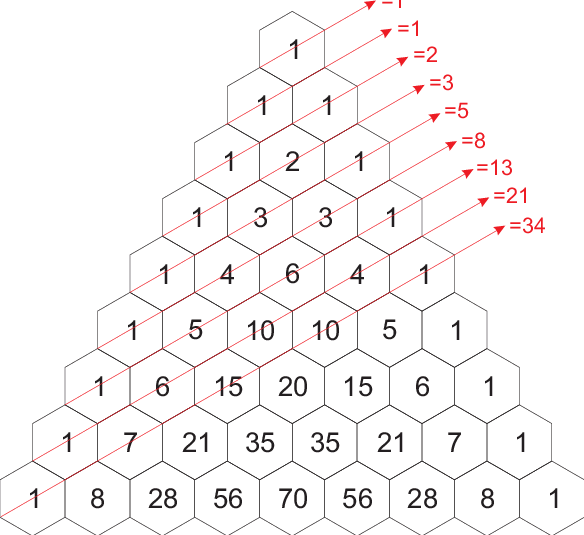

In [912]:
from IPython.display import Image
url = "https://raw.githubusercontent.com/gawron/python-for-social-science/refs/heads/master/intro/pascal.png"
#img = Image("pascal.png")
img = Image(url)
img

## Completely optional  appendix exercise

1.  The function `make_pascals_triangle` defined above gives you a working Pascal's triangle and the examples show how to use it.  Write a function `fib_n_from_pascal` that takes two arguments, `n` and a Pascal's Triangle of the sort produced by `make_pascals_triangle`; `fib_n_from_pascal` should return the $n$-th Fibonacci number (so `fib_n_from_pascal(n)` should equal `fibonacci_seq_n (n)`) and it should compute it by doing the correct diagonal sum in Pascal's triangle.  Once you have defined `fib_n_from_pascal`, the code snippet in the cell below should work.
2.  You know that the numbers in Pascal's Triangle are the coefficients in the Binomial Theorem. Modify  `fib_n_from_pascal` to eliminate its dependence on a precomputed Pascal's triangle table. Call the modified function   `fib_n_from_binomial`.  It should have a single parameter `n`.  Instead of summing entries in Pascal's triangular table it will sum appropriate binomial coefficients.  Note: if you have done part (a) of this problem, this should be a very small modification.  It is particularly small if you import a standard Python module that provides a function that computes binomial coefficients (it is not, however, named `compute_binomial_coeffient` or anything quite so transparent).  If not, refresh your memory of the Binomial theorem (Google it, I mean), which will tell you another way to compute the numbers in Pascal's Triangle.   Test it in an appropriately m,odified version of the code cell below.
3.  This is far from the easiest way to compute the $n$-th Fibonacci number. The closed form is, but it does avoid floating point issues and it sums n/2 numbers instead of n. So, probably no Nobel Prize in CS.  But this is fun.

In [608]:
m=20
# SHd produce same output as previous cell
rows = make_pascals_triangle(m)
# Makes no diff if rows has more than enough rows
#rows = make_pascals_triangle(m+5)
for n in range(1,m+1):
    print(f"{n:>2}   {fib_n_from_pascal (rows,n):>4}")

 1      1
 2      1
 3      2
 4      3
 5      5
 6      8
 7     13
 8     21
 9     34
10     55
11     89
12    144
13    233
14    377
15    610
16    987
17   1597
18   2584
19   4181
20   6765


In [602]:
m=20
# SHd produce same output as previous cell
for n in range(1,m+1):
    print(f"{n:>2}   {fibonacci_seq_n (n):>4}")


 1      1
 2      1
 3      2
 4      3
 5      5
 6      8
 7     13
 8     21
 9     34
10     55
11     89
12    144
13    233
14    377
15    610
16    987
17   1597
18   2584
19   4181
20   6765


In [566]:
m=20
# SHd produce same output as previous two cells
for n in range(m+1):
    print(f"{n:>2}   {fib_n_from_binomial (n):>3}")

 0     0
 1     1
 2     1
 3     2
 4     3
 5     5
 6     8
 7    13
 8    21
 9    34
10    55
11    89
12   144
13   233
14   377
15   610
16   987
17   1597
18   2584
19   4181
20   6765


In [607]:
import math

def fib_n_from_pascal (pt,m):
    """
    pt is a pascals triangle, n is an integer.
    
    Return the nth Fiobonacci number.
    """
    n=m-1
    # Need to count down from different starting points for odds and evens
    parity_bit = m%2
    return sum(pt[r][n-r] for r in range(n+parity_bit,n//2,-1))


def fib_n_from_pascal_alt (pt,m):
    """
    pt is a pascals triangle, n is an integer.
    
    Return the nth Fiobonacci number.
    """
    n=m-1
    r,tot=n,0
    while n-r<=r:
        tot += pt[r][n-r]
        r-=1
    return tot


def fib_n_from_binomial_alt(n):
    """
    This is the correct, more complicated version with no m,.n offset
    n is an integer.
    
    Return the nth Fiobonacci number.
    """
    r, tot = n-1,0
    while n-(r+1) <= r:
        tot += math.comb(r,(n-(r+1)))
        #print(n-r,r,math.comb(r,n-r), tot)
        r-=1
    return tot

def fib_n_from_binomial_minor_alt(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    #  Consistency with other fib fns requires
    #  fib_n_from_binomial(12) = 144 (not 233)
    n=m-1
    r, tot = n,0
    while n-r <= r:
        tot += math.comb(r,(n-r))
        #print(n-r,r,math.comb(r,n-r), tot)
        r-=1
    return tot

def fib_n_from_binomialx(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    #  Consistency with other fib fns requires
    #  fib_n_from_binomial(12) = 144 (not 233)
    n=m-1
    #rather than : r, tot = n//2,1
    # round up when n is odd
    r, tot = round(n/2),0
    while r <= n:
        tot += math.comb(r,n-r)
        #print(r,n-r,math.comb(r,n-r), tot)
        r+=1
    return tot

def fib_n_from_binomial(m):
    """
    m is an integer.
    
    Return the mth Fibonacci number.
    """
    #  The code is simpler if you offset by 1
    n=m-1
    return sum(math.comb(x,n-x) for x in range(round(n/2),n+1))